# Load training and testing data

In [41]:
import pandas as pd

df_train = pd.read_csv('../Dataset/RNA_Train.csv')
df_test = pd.read_csv('../Dataset/test.csv')

# Map character to number (peptides encoding)

In [42]:
def charToNumEncoding(peptide):
    i = 0
    for character in peptide:
        mapping[character] = i
        i += 1

# Creating list of list of instances of training data

In [43]:
def traindataEncoding(data):
    Features = []
    row = len(data)
    for i in range(row):
        l = []
        sequence = data['Sequence'][i]
        for character in sequence:
            l.append(mapping[character])
        l.append(data['label'][i])
        Features.append(l)
    #print(Features)
    return Features

# Creating list of list of instances of testing data

In [44]:
def testdataEncoding(data):
    Features = []
    row = len(data)
    for i in range(row):
        l = []
        sequence = data['Sequence'][i]
        for character in sequence:
            l.append(mapping[character])
        Features.append(l)
    #print(Features)
    return Features


# Data Imbalance handling using Random oversampling on minority class

In [45]:
def Oversampling(x_train,y_train):
    oversample = RandomOverSampler(sampling_strategy='minority')
    X_resampled, y_resampled = oversample.fit_resample(x_train, y_train)
    print("x-shape :",X_resampled.shape,"\ny-shape :", y_resampled.shape)
    return X_resampled,y_resampled

# Data Imbalance handling using ADASYN(Adaptive Synthetic Oversampling) on minority class

In [46]:
def Oversampling2(x_train, y_train):
    adasyn = ADASYN(sampling_strategy='minority')
    X_resampled, y_resampled = adasyn.fit_resample(x_train, y_train)
    print("x-shape :", X_resampled.shape, "\ny-shape :", y_resampled.shape)
    return X_resampled, y_resampled

# RandomForest Classifier

In [47]:
def RandomForest(x,y,test_df):
    clf = RandomForestClassifier()
    clf.fit(x, y)
    y_pred = clf.predict(test_df)
    return y_pred  

# XGBoost Classifier

In [48]:
def XGBoost(x,y,test_df):
    clf = XGBClassifier()
    clf.fit(x, y)
    y_pred = clf.predict(test_df)
    return y_pred  

# Support Vector Machine

In [49]:
from sklearn import svm

def SVM(x, y, test_df):
    model = svm.SVC(C=0.1, gamma=1, kernel='rbf')
    model.fit(x, y)
    y_pred = model.predict(test_df)
    
    return y_pred


# LightGBM

In [50]:
def LightGBM(x, y, test_df):
    param_grid = {
        'learning_rate': [0.05, 0.1, 0.2],
        'n_estimators': [50, 100, 150],
        'num_leaves': [31, 50, 100],
        'boosting_type': ['gbdt', 'dart', 'goss']
    }
    clf = GridSearchCV(LGBMClassifier(), param_grid, refit=True, verbose=2)
    clf.fit(x, y)
    y_pred = clf.predict(test_df)
    return y_pred 

# Logistic Regression

In [51]:
def LogisticRegressionModel(x, y, test_df):
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
    clf = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=2)
    clf.fit(x, y)
    y_pred = clf.predict(test_df)
    return y_pred 

# Pipelining of RandomForest and XGBoost

In [52]:
def Pipelining(x,y,test_df):
    model = [('lr', RandomForestClassifier()), ('XG', make_pipeline(StandardScaler(), XGBClassifier()))]
    clf = StackingClassifier(estimators=model)
    clf.fit(x, y)
    y_pred = clf.predict(test_df)
    return y_pred

In [53]:
def GenerateCSV(y_pred):
    df3 = pd.read_csv('../Dataset/test.csv')
    df3['label'] = y_pred
    compress = dict(method='zip', archive_name='result.csv')
    df3.to_csv('result.zip', index=False, compression=compress)


In [54]:
mapping = {}      # dictionary where key = character and value = numeric

charToNumEncoding('XMLQVRAGTWFPSCNEKHIYD')     # RNA Sequence
print(mapping)

{'X': 0, 'M': 1, 'L': 2, 'Q': 3, 'V': 4, 'R': 5, 'A': 6, 'G': 7, 'T': 8, 'W': 9, 'F': 10, 'P': 11, 'S': 12, 'C': 13, 'N': 14, 'E': 15, 'K': 16, 'H': 17, 'I': 18, 'Y': 19, 'D': 20}


In [55]:
train_df = pd.DataFrame(traindataEncoding(df_train))  


In [56]:
train_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,1,2,3,2,4,5,6,7,6,0
1,0,0,0,0,0,0,0,1,2,3,2,4,5,6,7,6,5,0
2,0,0,0,0,0,0,1,2,3,2,4,5,6,7,6,5,8,0
3,0,0,0,0,0,1,2,3,2,4,5,6,7,6,5,8,9,0
4,0,0,0,0,1,2,3,2,4,5,6,7,6,5,8,9,10,0
5,0,0,0,1,2,3,2,4,5,6,7,6,5,8,9,10,5,0
6,0,0,1,2,3,2,4,5,6,7,6,5,8,9,10,5,11,0
7,0,1,2,3,2,4,5,6,7,6,5,8,9,10,5,11,12,0
8,1,2,3,2,4,5,6,7,6,5,8,9,10,5,11,12,7,0
9,2,3,2,4,5,6,7,6,5,8,9,10,5,11,12,7,13,0


In [57]:
print(train_df.loc[[5299]])

      0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17
5299  20  20   2  15   7   4  20   7  20   8  15   6   4   5  18   6  12   0


In [58]:
test_df =  pd.DataFrame(testdataEncoding(df_test))

In [59]:
test_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0,0,0,0,0,0,0,12,15,4,12,20,8,14,2,19
1,0,0,0,0,0,0,0,12,15,4,12,20,8,14,2,19,12
2,0,0,0,0,0,0,12,15,4,12,20,8,14,2,19,12,11
3,0,0,0,0,0,12,15,4,12,20,8,14,2,19,12,11,10
4,0,0,0,0,12,15,4,12,20,8,14,2,19,12,11,10,16


In [60]:
x_train = train_df.loc[:, :16]       # independent variable
y_train = train_df[17]               # dependent variable

# Checking data imbalance

In [61]:

count = y_train.value_counts()
print(count)

17
0    291963
1     38899
Name: count, dtype: int64


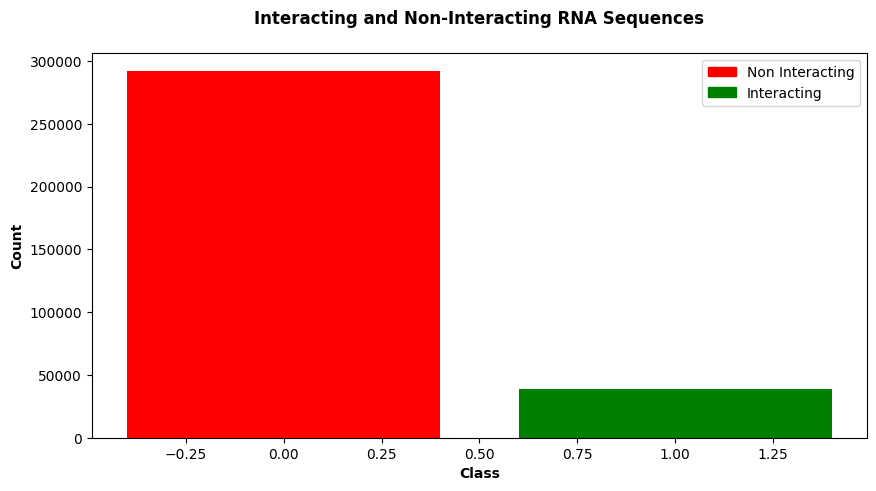

In [62]:
import matplotlib.pyplot as plt
categories = pd.unique(y_train)
fig = plt.figure(figsize = (10, 5))
colors = {'Non Interacting':'red', 'Interacting':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.bar(categories, count, color=colors.values())
plt.xlabel("Class",fontweight="bold")
plt.ylabel("Count",fontweight="bold")
plt.title("Interacting and Non-Interacting RNA Sequences\n",fontweight="bold")
plt.legend(handles, labels)
plt.show()

# Handling data imbalnce using oversampling on minority class

In [63]:
from imblearn.over_sampling import RandomOverSampler

x_resampled, y_resampled = Oversampling(x_train,y_train)

x-shape : (583926, 17) 
y-shape : (583926,)


In [24]:

from imblearn.over_sampling import ADASYN

x_resampled, y_resampled = Oversampling2(x_train, y_train)

x-shape : (578673, 17) 
y-shape : (578673,)


In [64]:
count = y_resampled.value_counts()
print(count)

17
0    291963
1    291963
Name: count, dtype: int64


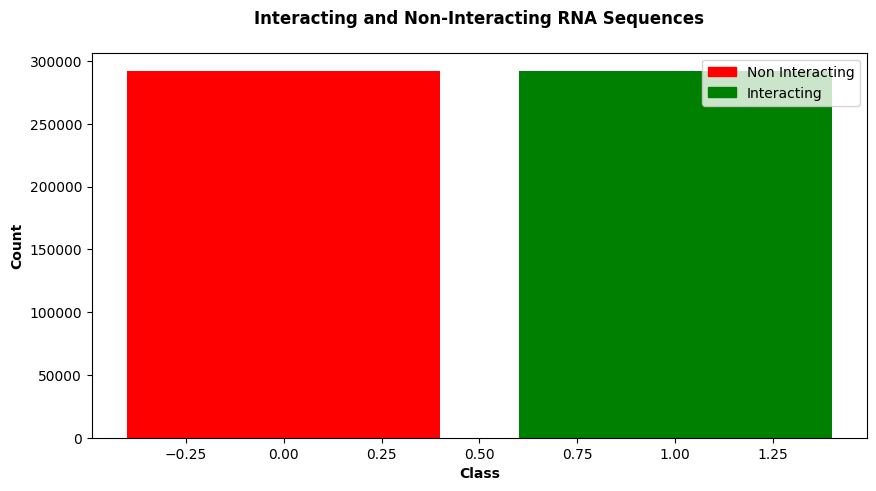

In [65]:
categories = pd.unique(y_resampled)
fig = plt.figure(figsize = (10, 5))
colors = {'Non Interacting':'red', 'Interacting':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.bar(categories, count, color=colors.values())
plt.xlabel("Class",fontweight="bold")
plt.ylabel("Count",fontweight="bold")
plt.title("Interacting and Non-Interacting RNA Sequences\n",fontweight="bold")
plt.legend(handles, labels)
plt.show()

# Train Test Split

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.25, random_state=42)

In [67]:
# %pip install --upgrade pip
# %pip install \
#    --no-binary lightgbm \
#    --config-settings=cmake.define.USE_OPENMP=OFF \
#    'lightgbm>=4.0.0'
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from lightgbm import LGBMClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [28]:
y_pred1 = RandomForest(X_train, y_train,X_test)

In [31]:
y_pred2 = XGBoost(X_train, y_train,X_test)

In [35]:
y_pred3 = Pipelining(X_train, y_train,X_test)

In [70]:
y_pred4 = SVM(X_train,y_train,X_test)

In [68]:
y_pred5= LightGBM(X_train,y_train,X_test)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 175245, number of negative: 175110
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 350355, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500193 -> initscore=0.000771
[LightGBM] [Info] Start training from score 0.000771
[CV] END boosting_type=gbdt, learning_rate=0.05, n_estimators=50, num_leaves=31; total time=   2.7s
[LightGBM] [Info] Number of positive: 175245, number of negative: 175110
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `for

In [33]:
y_pred6 = LogisticRegressionModel(X_train,y_train,X_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.1s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.9s
[CV] END ................................C=0.001, penalty=l2; total time=   0.7s
[CV] END ................................C=0.001, penalty=l2; total time=   0.7s
[CV] END ................................C=0.001, penalty=l2; total time=   0.8s
[CV] END ................................C=0.001, penalty=l2; total time=   0.7s
[CV] END .................................C=0.01, penalty=l1; total time=   0.1s
[CV] END .................................C=0.01

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "

# Calculating Accuracy and MCC

In [31]:
from sklearn.metrics import matthews_corrcoef, accuracy_score

In [30]:
# for RandomForest
print("Matthews-Coefficient = ", matthews_corrcoef(y_test, y_pred1))
print("Accuracy = ",accuracy_score(y_test, y_pred1))

Matthews-Coefficient =  0.758102043894307
Accuracy =  0.8779420608423366


In [32]:
# for XGBoost
print("Matthews-Coefficient = ", matthews_corrcoef(y_test, y_pred2))
print("Accuracy = ",accuracy_score(y_test, y_pred2))

Matthews-Coefficient =  0.6084208868707983
Accuracy =  0.8040838050999177


In [34]:
# for RandomForest + XGBoost
print("Matthews-Coefficient = ", matthews_corrcoef(y_test, y_pred3))
print("Accuracy = ",accuracy_score(y_test, y_pred3))

Matthews-Coefficient =  0.7747102065441066
Accuracy =  0.8872045842578576


In [71]:
# for SVM
print("Matthews-Coefficient = ", matthews_corrcoef(y_test, y_pred4))
print("Accuracy = ",accuracy_score(y_test, y_pred4))

Matthews-Coefficient =  0.4733346440537104
Accuracy =  0.6842487429957118


In [69]:
# for LGBM
print("Matthews-Coefficient = ", matthews_corrcoef(y_test, y_pred5))
print("Accuracy = ",accuracy_score(y_test, y_pred5))

Matthews-Coefficient =  0.6061149364533069
Accuracy =  0.8028318559822444


In [34]:
# for Logistic Regression
print("Matthews-Coefficient = ", matthews_corrcoef(y_test, y_pred6))
print("Accuracy = ",accuracy_score(y_test, y_pred6))

Matthews-Coefficient =  0.14049050834222984
Accuracy =  0.5703295108143417


# Confusion Matrix for  RandomForest + XGBoost

Text(0.5, 427.9555555555555, 'Predicted label')

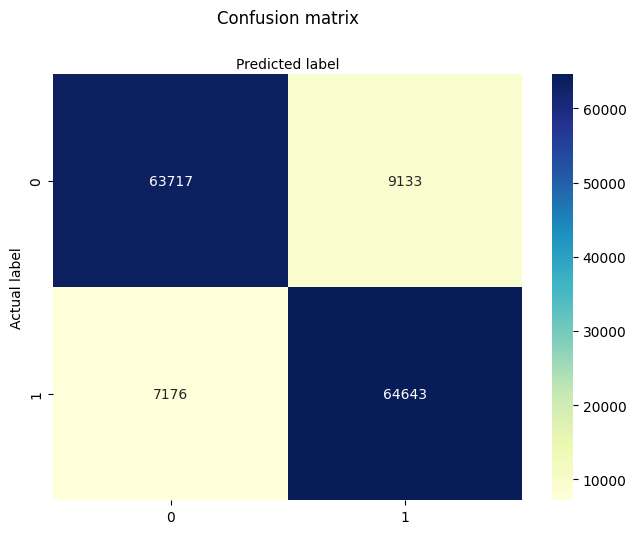

In [36]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
cc=confusion_matrix(y_test, y_pred3)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Precesion Recall Curve for RandomForest

In [37]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred1)
plt.figure(figsize = (5,5))
plt.plot(recall, precision, label = 'Rand')
plt.xlabel('recall',fontweight="bold")
plt.ylabel('precision',fontweight="bold")
plt.title('Hybrid Model PRC Curve',fontweight="bold")
plt.show()

NameError: name 'y_pred1' is not defined

# Precision Recall Curve for RandomForest + XGBoost

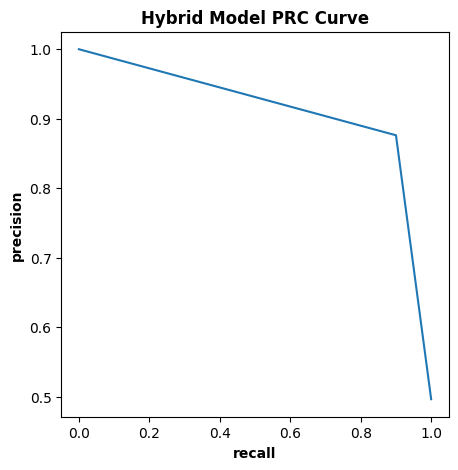

In [38]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred3)
plt.figure(figsize = (5,5))
plt.plot(recall, precision, label = 'Rand')
plt.xlabel('recall',fontweight="bold")
plt.ylabel('precision',fontweight="bold")
plt.title('Hybrid Model PRC Curve',fontweight="bold")
plt.show()

# Precision Recall Curve for LGBM

In [28]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred5)
plt.figure(figsize = (5,5))
plt.plot(recall, precision, label = 'Rand')
plt.xlabel('recall',fontweight="bold")
plt.ylabel('precision',fontweight="bold")
plt.title('Hybrid Model PRC Curve',fontweight="bold")
plt.show()

NameError: name 'y_pred5' is not defined

# ROC Curve for RandomForest

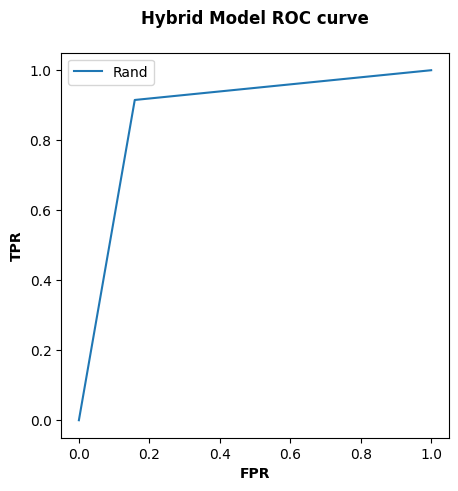

AUC Score: 0.8782043502309718


In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='Rand')
plt.xlabel('FPR', fontweight="bold")
plt.ylabel('TPR', fontweight="bold")
plt.title('Hybrid Model ROC curve\n', fontweight="bold")
plt.legend()
plt.show()

auc = roc_auc_score(y_test, y_pred1)
print("AUC Score:", auc)

# Receiver Operating Characterics  Curve for RandomForest + XGBoost

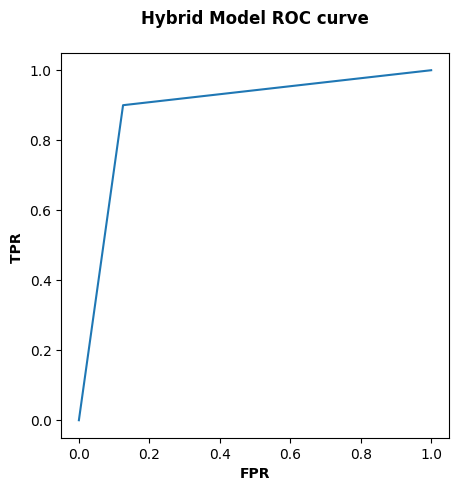

In [39]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
plt.figure(figsize = (5,5))
plt.plot(fpr, tpr, label = 'Rand')
plt.xlabel('FPR',fontweight="bold")
plt.ylabel('TPR ',fontweight="bold")
plt.title('Hybrid Model ROC curve\n',fontweight="bold")
plt.show()

# Training Hybrid Model on entire train data and finding the predictions for test data

In [30]:
y_pred = Pipelining(x_resampled, y_resampled,test_df)

# Generate CSV

In [62]:
GenerateCSV(y_pred)